In [1]:
# 산불과 가뭄의 상관관계 구하기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

df = pd.read_csv('corr_final.csv', encoding='cp949')

# 모든 행 다 출력하도록 설정
pd.set_option('display.max_rows', None)

print(df)

      시도  피해시작일  산불횟수  가뭄횟수
0    강원도   2013    36     0
1    강원도   2014    73    39
2    강원도   2015   125    62
3    강원도   2016    91    20
4    강원도   2017   103    58
5    강원도   2018    47    72
6    강원도   2019    78    58
7    강원도   2020    74    85
8   전라남도   2013    60     8
9   전라남도   2014    80     3
10  전라남도   2015    56     4
11  전라남도   2016    24    18
12  전라남도   2017    35    34
13  전라남도   2018    42     6
14  전라남도   2019    39     7
15  전라남도   2020    38    11
16  경상북도   2013    61     7
17  경상북도   2014   124    17
18  경상북도   2015   105    51
19  경상북도   2016    56    28
20  경상북도   2017   139    21
21  경상북도   2018   117    20
22  경상북도   2019   140     8
23  경상북도   2020   140     4
24  경상남도   2013    50     3
25  경상남도   2014    43     5
26  경상남도   2015    34     0
27  경상남도   2016    18     0
28  경상남도   2017    75     7
29  경상남도   2018    84     7
30  경상남도   2019    88     4
31  경상남도   2020    57     2
32  충청북도   2013    14     0
33  충청북도   2014    18     7
34  충청북도   2015    3

In [4]:
Q1 = df['산불횟수'].describe()['25%']  # Q1 은 1/4 즉, 백분위수에서 25%
Q3 = df['산불횟수'].describe()['75%']  # Q3 은 3/4 즉, 백분위수에서 75%
IQR = Q3 - Q1  # IQR(Interquartile range) 4분위 범위는 Q3-Q1
Q2 = df['산불횟수'].describe()['50%']  # Q2 (중앙값) 백분위수 50%
Q4 = Q2 + IQR
M = df['산불횟수'].mean()
print(Q1, Q2, M, Q3, Q4)

29.0 46.5 66.546875 88.25 105.75


In [5]:
kangwon = df.head(8)
kangwon

,시도,피해시작일,산불횟수,가뭄횟수
0,강원도,2013,36,0
1,강원도,2014,73,39
2,강원도,2015,125,62
3,강원도,2016,91,20
4,강원도,2017,103,58
5,강원도,2018,47,72
6,강원도,2019,78,58
7,강원도,2020,74,85


In [6]:
kangwon.corr()

,피해시작일,산불횟수,가뭄횟수
피해시작일,1.000000,0.070095,0.788737
산불횟수,0.070095,1.000000,0.303539
가뭄횟수,0.788737,0.303539,1.000000


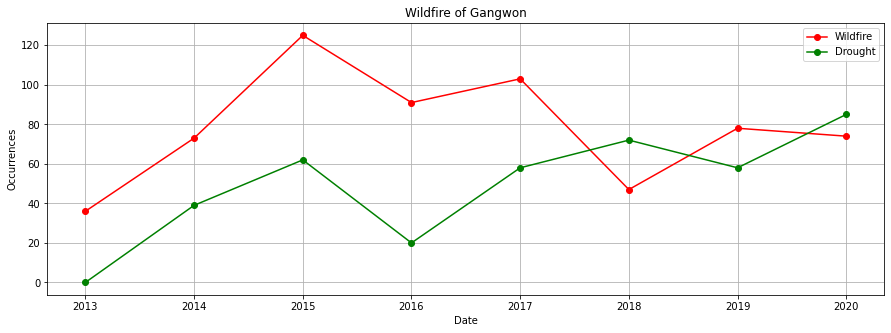

In [7]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()

plt.title('Wildfire of Gangwon')
fire = ax.plot(kangwon['피해시작일'], kangwon['산불횟수'], label='Wildfire', marker='o', color='red')
drought = ax.plot(kangwon['피해시작일'], kangwon['가뭄횟수'], label='Drought', marker='o', color='green')

plt.grid()
ax.set_xlabel("Date")
ax.set_ylabel("Occurrences")
ax.legend()

plt.show()

In [8]:
jeonnam = df[8:16]
jeonnam = jeonnam.sort_values(by=['피해시작일'])
jeonnam

,시도,피해시작일,산불횟수,가뭄횟수
8,전라남도,2013,60,8
9,전라남도,2014,80,3
10,전라남도,2015,56,4
11,전라남도,2016,24,18
12,전라남도,2017,35,34
13,전라남도,2018,42,6
14,전라남도,2019,39,7
15,전라남도,2020,38,11


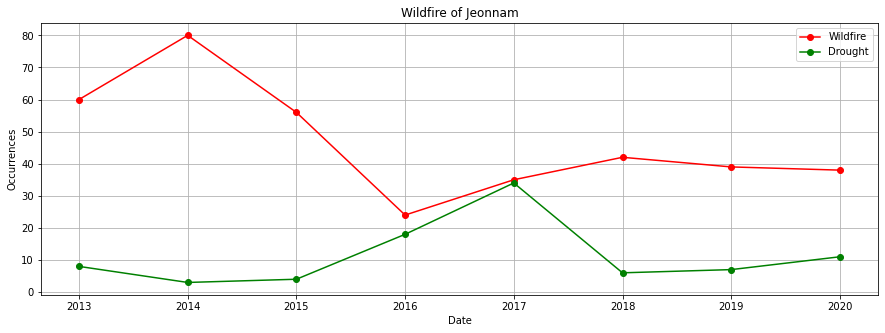

In [9]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()

plt.title('Wildfire of Jeonnam')
fire = ax.plot(jeonnam['피해시작일'], jeonnam['산불횟수'], label='Wildfire', marker='o', color='red')
drought = ax.plot(jeonnam['피해시작일'], jeonnam['가뭄횟수'], label='Drought', marker='o', color='green')

plt.grid()
ax.set_xlabel("Date")
ax.set_ylabel("Occurrences")
ax.legend()

plt.show()

In [10]:
jeonnam.corr()

,피해시작일,산불횟수,가뭄횟수
피해시작일,1.000000,-0.644217,0.178693
산불횟수,-0.644217,1.000000,-0.586604
가뭄횟수,0.178693,-0.586604,1.000000


In [11]:
kyungbuk = df[16:24]
kyungbuk = kyungbuk.sort_values(by=['피해시작일'])
kyungbuk

,시도,피해시작일,산불횟수,가뭄횟수
16,경상북도,2013,61,7
17,경상북도,2014,124,17
18,경상북도,2015,105,51
19,경상북도,2016,56,28
20,경상북도,2017,139,21
21,경상북도,2018,117,20
22,경상북도,2019,140,8
23,경상북도,2020,140,4


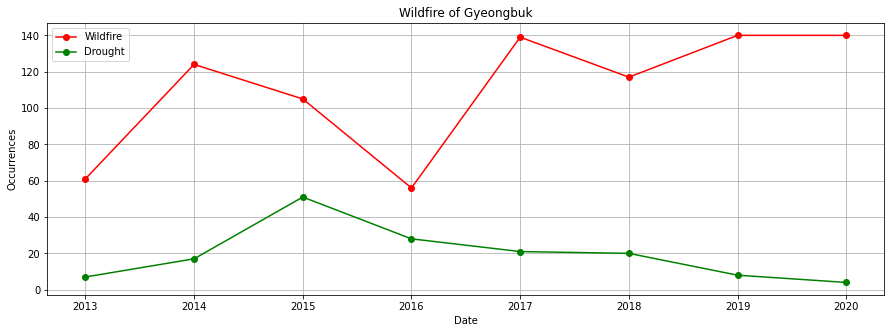

In [12]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()

plt.title('Wildfire of Gyeongbuk')
fire = ax.plot(kyungbuk['피해시작일'], kyungbuk['산불횟수'], label='Wildfire', marker='o', color='red')
drought = ax.plot(kyungbuk['피해시작일'], kyungbuk['가뭄횟수'], label='Drought', marker='o', color='green')

plt.grid()
ax.set_xlabel("Date")
ax.set_ylabel("Occurrences")
ax.legend()

plt.show()

In [13]:
kyungbuk.corr()

,피해시작일,산불횟수,가뭄횟수
피해시작일,1.000000,0.639631,-0.319980
산불횟수,0.639631,1.000000,-0.220907
가뭄횟수,-0.319980,-0.220907,1.000000


In [14]:
kyungnam = df[23:31]
kyungnam = kyungnam.sort_values(by=['피해시작일'])
kyungnam

,시도,피해시작일,산불횟수,가뭄횟수
24,경상남도,2013,50,3
25,경상남도,2014,43,5
26,경상남도,2015,34,0
27,경상남도,2016,18,0
28,경상남도,2017,75,7
29,경상남도,2018,84,7
30,경상남도,2019,88,4
23,경상북도,2020,140,4


In [15]:
kyungnam.corr()

,피해시작일,산불횟수,가뭄횟수
피해시작일,1.000000,0.800520,0.322525
산불횟수,0.800520,1.000000,0.537769
가뭄횟수,0.322525,0.537769,1.000000


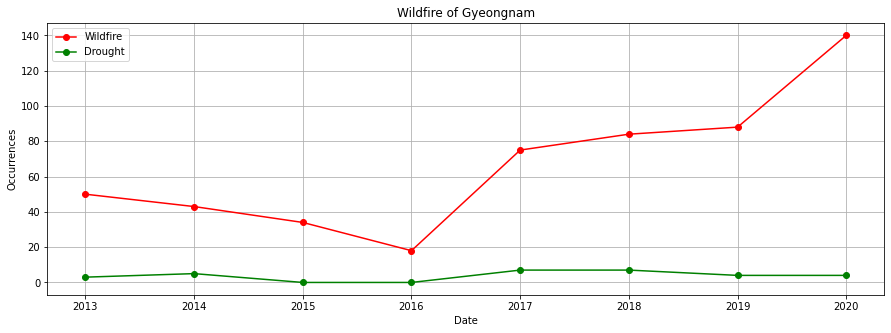

In [16]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()

plt.title('Wildfire of Gyeongnam')
fire = ax.plot(kyungnam['피해시작일'], kyungnam['산불횟수'], label='Wildfire', marker='o', color='red')
drought = ax.plot(kyungnam['피해시작일'], kyungnam['가뭄횟수'], label='Drought', marker='o', color='green')

plt.grid()
ax.set_xlabel("Date")
ax.set_ylabel("Occurrences")
ax.legend()

plt.show()

In [17]:
chungbuk = df[32:40]
chungbuk = chungbuk.sort_values(by=['피해시작일'])
chungbuk

,시도,피해시작일,산불횟수,가뭄횟수
32,충청북도,2013,14,0
33,충청북도,2014,18,7
34,충청북도,2015,31,35
35,충청북도,2016,19,11
36,충청북도,2017,46,90
37,충청북도,2018,33,44
38,충청북도,2019,28,34
39,충청북도,2020,13,7


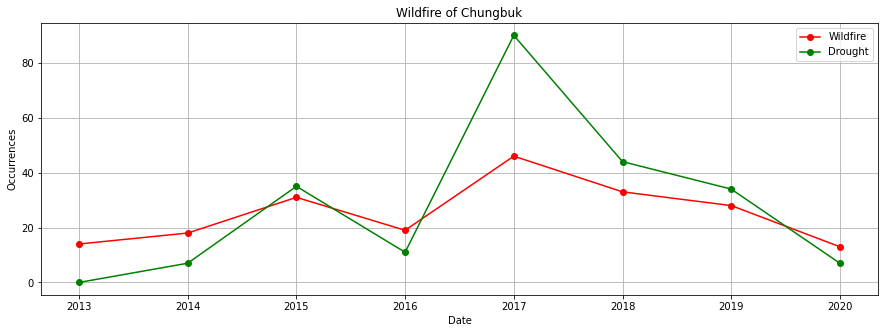

In [18]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()

plt.title('Wildfire of Chungbuk')
fire = ax.plot(chungbuk['피해시작일'], chungbuk['산불횟수'], label='Wildfire', marker='o', color='red')
drought = ax.plot(chungbuk['피해시작일'], chungbuk['가뭄횟수'], label='Drought', marker='o', color='green')

plt.grid()
ax.set_xlabel("Date")
ax.set_ylabel("Occurrences")
ax.legend()

plt.show()

In [19]:
chungbuk.corr()

,피해시작일,산불횟수,가뭄횟수
피해시작일,1.000000,0.195505,0.285581
산불횟수,0.195505,1.000000,0.977994
가뭄횟수,0.285581,0.977994,1.000000


In [20]:
kyungki = df[48:56]
kyungki = kyungki.sort_values(by=['피해시작일'])
kyungki

,시도,피해시작일,산불횟수,가뭄횟수
48,경기도,2013,14,4
49,경기도,2014,89,26
50,경기도,2015,215,59
51,경기도,2016,151,41
52,경기도,2017,198,86
53,경기도,2018,104,52
54,경기도,2019,202,66
55,경기도,2020,231,9


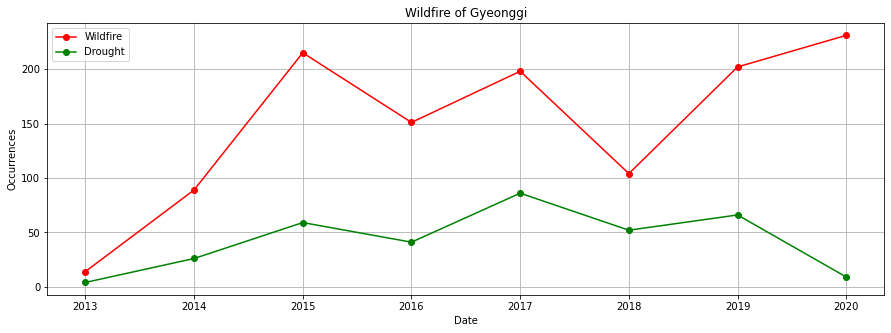

In [21]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()

plt.title('Wildfire of Gyeonggi')
fire = ax.plot(kyungki['피해시작일'], kyungki['산불횟수'], label='Wildfire', marker='o', color='red')
drought = ax.plot(kyungki['피해시작일'], kyungki['가뭄횟수'], label='Drought', marker='o', color='green')

plt.grid()
ax.set_xlabel("Date")
ax.set_ylabel("Occurrences")
ax.legend()

plt.show()

In [22]:
kyungki.corr()

,피해시작일,산불횟수,가뭄횟수
피해시작일,1.000000,0.692504,0.265024
산불횟수,0.692504,1.000000,0.494691
가뭄횟수,0.265024,0.494691,1.000000


In [23]:
jeonbuk = df[56:64]
jeonbuk = jeonbuk.sort_values(by=['피해시작일'])
jeonbuk

,시도,피해시작일,산불횟수,가뭄횟수
56,전라북도,2013,32,0
57,전라북도,2014,29,1
58,전라북도,2015,21,4
59,전라북도,2016,13,25
60,전라북도,2017,24,4
61,전라북도,2018,29,18
62,전라북도,2019,23,29
63,전라북도,2020,23,0


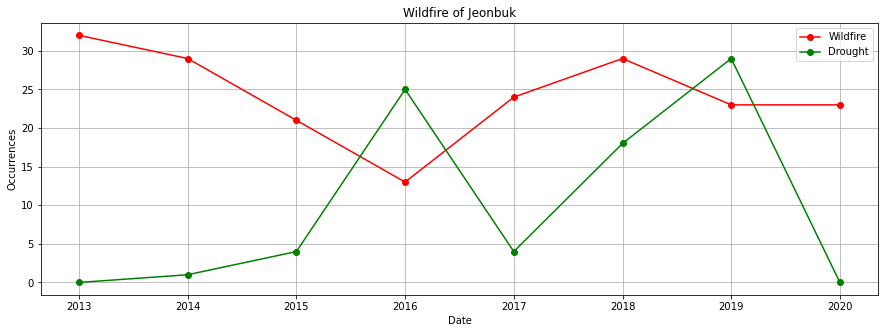

In [24]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()

plt.title('Wildfire of Jeonbuk')
fire = ax.plot(jeonbuk['피해시작일'], jeonbuk['산불횟수'], label='Wildfire', marker='o', color='red')
drought = ax.plot(jeonbuk['피해시작일'], jeonbuk['가뭄횟수'], label='Drought', marker='o', color='green')

plt.grid()
ax.set_xlabel("Date")
ax.set_ylabel("Occurrences")
ax.legend()

plt.show()

In [25]:
jeonbuk.corr()

,피해시작일,산불횟수,가뭄횟수
피해시작일,1.000000,-0.285593,0.392236
산불횟수,-0.285593,1.000000,-0.486204
가뭄횟수,0.392236,-0.486204,1.000000


In [26]:
fs = pd.read_csv('firelevel_and_size.csv', encoding='cp949')

In [27]:
Q1 = fs['산불규모'].describe()['25%']  # Q1 은 1/4 즉, 백분위수에서 25%
Q3 = fs['산불규모'].describe()['75%']  # Q3 은 3/4 즉, 백분위수에서 75%
IQR = Q3 - Q1  # IQR(Interquartile range) 4분위 범위는 Q3-Q1
Q2 = fs['산불규모'].describe()['50%']  # Q2 (중앙값) 백분위수 50%
Q4 = Q2 + IQR
M = fs['산불규모'].mean()
print(Q1, Q2, M, Q3, Q4)

0.15304187175 0.2841675685 1.8719805060171877 0.5808049965 0.71193069325


In [13]:
# 상관관계 히트맵으로 시각화
import pandas as pd
dt = pd.read_csv('hmcorr.csv', encoding='cp949')

In [14]:
dt.head()

,시도,소방서개수,산림 면적,도로보급률,인구밀도
0,서울,24,15323,3.5,15551
1,부산,11,34926,2.4,4278
2,대구,8,48338,2.1,2670
3,광주,5,18944,1.9,2775
4,인천,10,39373,2.2,2921


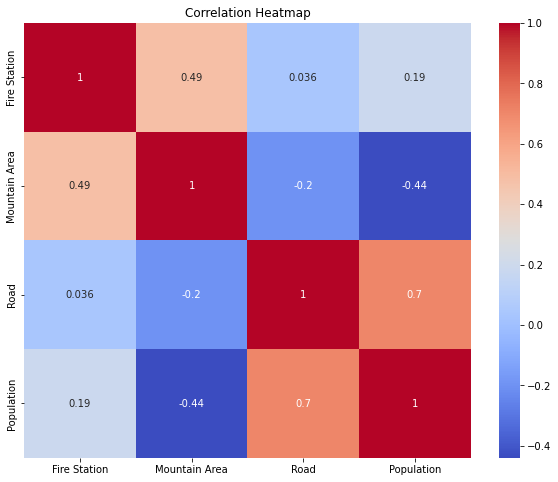

In [20]:
import pandas as pd
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Fire Station': [24, 11, 8, 5, 10, 5, 4, 3, 35, 18, 11, 16, 12, 17, 19, 20],
    'Mountain Area': [15323, 34926, 48338, 18944, 39373, 29764, 68001, 24849, 512105, 1366644, 488337, 404097, 440746, 686852, 1333691, 698810],
    'Road': [3.5, 2.4, 2.1, 1.9, 2.2, 2.5, 2.4, 1, 1.3, 1.9, 2, 1.8, 2.3, 2.3, 2, 2.2],
    'Population': [15551, 4278, 2670, 2775, 2921, 2727, 1047, 823, 1341, 91, 221, 264, 221, 143, 138, 312]
}

df = pd.DataFrame(data)

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

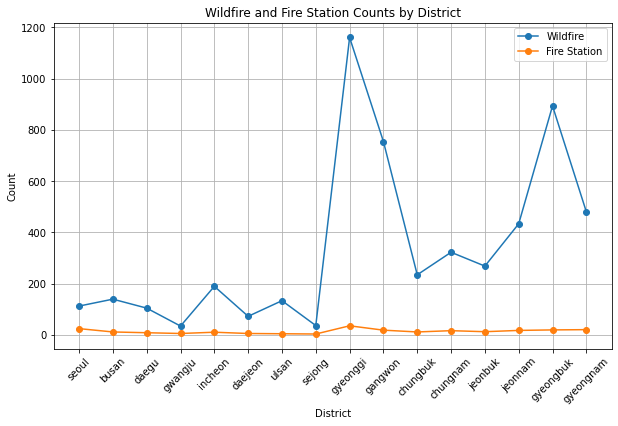

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'District': ['seoul', 'busan', 'daegu', 'gwangju', 'incheon', 'daejeon', 'ulsan', 'sejong', 'gyeonggi', 'gangwon', 'chungbuk', 'chungnam', 'jeonbuk', 'jeonnam', 'gyeongbuk', 'gyeongnam'],
    'Fire Station': [24, 11, 8, 5, 10, 5, 4, 3, 35, 18, 11, 16, 12, 17, 19, 20],
    'Mountain Area': [15323, 34926, 48338, 18944, 39373, 29764, 68001, 24849, 512105, 1366644, 488337, 404097, 440746, 686852, 1333691, 698810],
    'Road': [3.5, 2.4, 2.1, 1.9, 2.2, 2.5, 2.4, 1, 1.3, 1.9, 2, 1.8, 2.3, 2.3, 2, 2.2],
    'Population': [15551, 4278, 2670, 2775, 2921, 2727, 1047, 823, 1341, 91, 221, 264, 221, 143, 138, 312],
    'Wildfire': [112, 139, 104, 34, 189, 72, 133, 36, 1160, 754, 234, 322, 268, 433, 893, 480]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.plot(df['District'], df['Wildfire'], marker='o', label='Wildfire')
plt.plot(df['District'], df['Fire Station'], marker='o', label='Fire Station')
plt.xlabel('District')
plt.ylabel('Count')
plt.title('Wildfire and Fire Station Counts by District')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [32]:
import pandas as pd

# 데이터
data = {
    'District': ['seoul', 'busan', 'daegu', 'gwangju', 'incheon', 'daejeon', 'ulsan', 'sejong', 'gyeonggi', 'gangwon', 'chungbuk', 'chungnam', 'jeonbuk', 'jeonnam', 'gyeongbuk', 'gyeongnam'],
    'Fire Station': [24, 11, 8, 5, 10, 5, 4, 3, 35, 18, 11, 16, 12, 17, 19, 20],
    'Mountain Area': [15323, 34926, 48338, 18944, 39373, 29764, 68001, 24849, 512105, 1366644, 488337, 404097, 440746, 686852, 1333691, 698810],
    'Road': [3.5, 2.4, 2.1, 1.9, 2.2, 2.5, 2.4, 1, 1.3, 1.9, 2, 1.8, 2.3, 2.3, 2, 2.2],
    'Population': [15551, 4278, 2670, 2775, 2921, 2727, 1047, 823, 1341, 91, 221, 264, 221, 143, 138, 312],
    'Wildfire': [112, 139, 104, 34, 189, 72, 133, 36, 1160, 754, 234, 322, 268, 433, 893, 480]
}

df = pd.DataFrame(data)

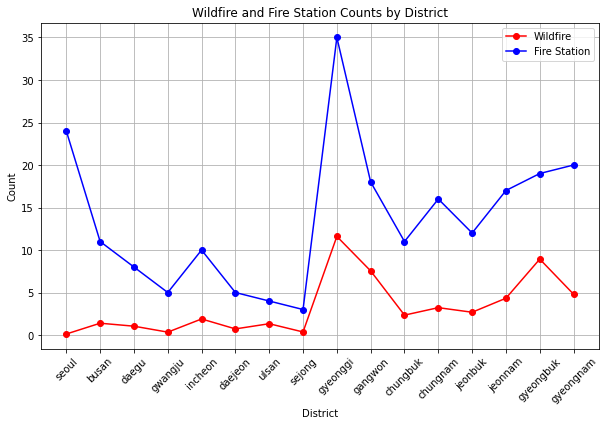

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'District': ['seoul', 'busan', 'daegu', 'gwangju', 'incheon', 'daejeon', 'ulsan', 'sejong', 'gyeonggi', 'gangwon', 'chungbuk', 'chungnam', 'jeonbuk', 'jeonnam', 'gyeongbuk', 'gyeongnam'],
    'Fire Station': [24, 11, 8, 5, 10, 5, 4, 3, 35, 18, 11, 16, 12, 17, 19, 20],
    'Mountain Area': [15323, 34926, 48338, 18944, 39373, 29764, 68001, 24849, 512105, 1366644, 488337, 404097, 440746, 686852, 1333691, 698810],
    'Road': [3.5, 2.4, 2.1, 1.9, 2.2, 2.5, 2.4, 1, 1.3, 1.9, 2, 1.8, 2.3, 2.3, 2, 2.2],
    'Population': [15551, 4278, 2670, 2775, 2921, 2727, 1047, 823, 1341, 91, 221, 264, 221, 143, 138, 312],
    'Wildfire': [0.12, 1.39, 1.04, 0.34, 1.89, 0.72, 1.33, 0.36, 11.60, 7.54, 2.34, 3.22, 2.68, 4.33, 8.93, 4.80]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.plot(df['District'], df['Wildfire'], marker='o', color='red', label='Wildfire')
plt.plot(df['District'], df['Fire Station'], marker='o', color='blue', label='Fire Station')
plt.xlabel('District')
plt.ylabel('Count')
plt.title('Wildfire and Fire Station Counts by District')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

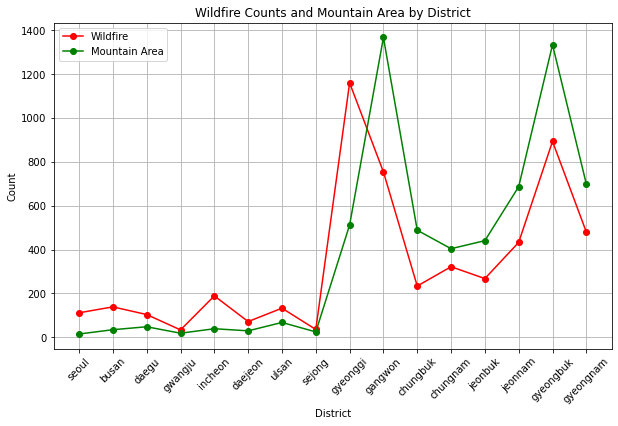

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'District': ['seoul', 'busan', 'daegu', 'gwangju', 'incheon', 'daejeon', 'ulsan', 'sejong', 'gyeonggi', 'gangwon', 'chungbuk', 'chungnam', 'jeonbuk', 'jeonnam', 'gyeongbuk', 'gyeongnam'],
    'Fire Station': [24, 11, 8, 5, 10, 5, 4, 3, 35, 18, 11, 16, 12, 17, 19, 20],
    'Mountain Area': [15.323, 34.926, 48.338, 18.944, 39.373, 29.764, 68.001, 24.849, 512.105, 1366.644, 488.337, 404.097, 440.746, 686.852, 1333.691, 698.810],
    'Road': [3.5, 2.4, 2.1, 1.9, 2.2, 2.5, 2.4, 1, 1.3, 1.9, 2, 1.8, 2.3, 2.3, 2, 2.2],
    'Population': [15551, 4278, 2670, 2775, 2921, 2727, 1047, 823, 1341, 91, 221, 264, 221, 143, 138, 312],
    'Wildfire': [112, 139, 104, 34, 189, 72, 133, 36, 1160, 754, 234, 322, 268, 433, 893, 480]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.plot(df['District'], df['Wildfire'], marker='o', color='red', label='Wildfire')
plt.plot(df['District'], df['Mountain Area'], marker='o', color='green', label='Mountain Area')
plt.xlabel('District')
plt.ylabel('Count')
plt.title('Wildfire Counts and Mountain Area by District')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

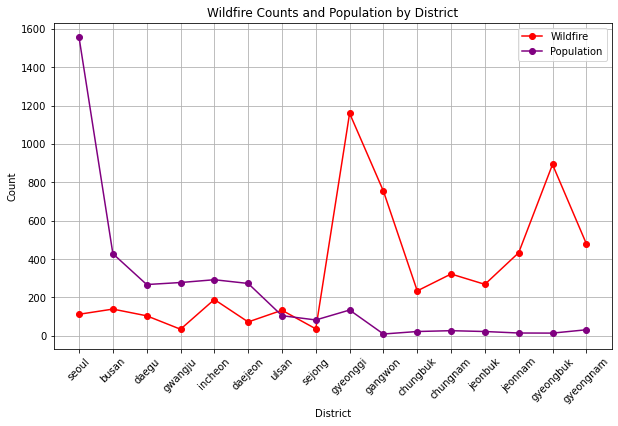

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터
data = {
    'District': ['seoul', 'busan', 'daegu', 'gwangju', 'incheon', 'daejeon', 'ulsan', 'sejong', 'gyeonggi', 'gangwon', 'chungbuk', 'chungnam', 'jeonbuk', 'jeonnam', 'gyeongbuk', 'gyeongnam'],
    'Fire Station': [24, 11, 8, 5, 10, 5, 4, 3, 35, 18, 11, 16, 12, 17, 19, 20],
    'Mountain Area': [15323, 34926, 48338, 18944, 39373, 29764, 68001, 24849, 512105, 1366644, 488337, 404097, 440746, 686852, 1333691, 698810],
    'Road': [3.5, 2.4, 2.1, 1.9, 2.2, 2.5, 2.4, 1, 1.3, 1.9, 2, 1.8, 2.3, 2.3, 2, 2.2],
    'Population': [1555.1, 427.8, 267.0, 277.5, 292.1, 272.7, 104.7, 82.3, 134.1, 9.1, 22.1, 26.4, 22.1, 14.3, 13.8, 31.2],
    'Wildfire': [112, 139, 104, 34, 189, 72, 133, 36, 1160, 754, 234, 322, 268, 433, 893, 480]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.plot(df['District'], df['Wildfire'], marker='o', color='red', label='Wildfire')
plt.plot(df['District'], df['Population'], marker='o', color='purple', label='Population')
plt.xlabel('District')
plt.ylabel('Count')
plt.title('Wildfire Counts and Population by District')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

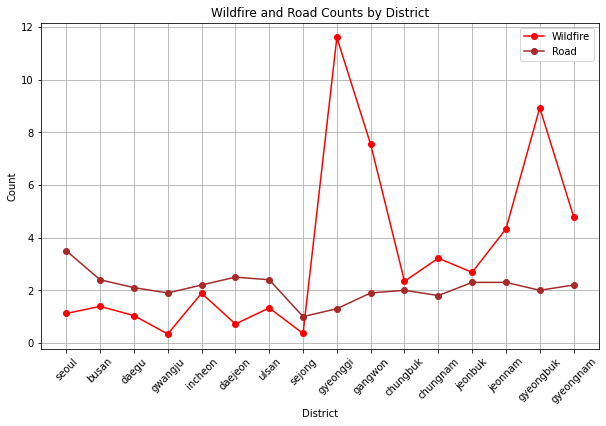

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터
data = {
    'District': ['seoul', 'busan', 'daegu', 'gwangju', 'incheon', 'daejeon', 'ulsan', 'sejong', 'gyeonggi', 'gangwon', 'chungbuk', 'chungnam', 'jeonbuk', 'jeonnam', 'gyeongbuk', 'gyeongnam'],
    'Fire Station': [24, 11, 8, 5, 10, 5, 4, 3, 35, 18, 11, 16, 12, 17, 19, 20],
    'Mountain Area': [15323, 34926, 48338, 18944, 39373, 29764, 68001, 24849, 512105, 1366644, 488337, 404097, 440746, 686852, 1333691, 698810],
    'Road': [3.5, 2.4, 2.1, 1.9, 2.2, 2.5, 2.4, 1, 1.3, 1.9, 2, 1.8, 2.3, 2.3, 2, 2.2],
    'Population': [15551, 4278, 2670, 2775, 2921, 2727, 1047, 823, 1341, 91, 221, 264, 221, 143, 138, 312],
    'Wildfire': [1.12, 1.39, 1.04, 0.34, 1.89, 0.72, 1.33, 0.36, 11.60, 7.54, 2.34, 3.22, 2.68, 4.33, 8.93, 4.80]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.plot(df['District'], df['Wildfire'], marker='o', color='red', label='Wildfire')
plt.plot(df['District'], df['Road'], marker='o', color='brown', label='Road')
plt.xlabel('District')
plt.ylabel('Count')
plt.title('Wildfire and Road Counts by District')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [47]:
df.corr()

,Fire Station,Mountain Area,Road,Population,Wildfire
Fire Station,1.000000,0.487786,0.035657,0.186261,0.801346
Mountain Area,0.487786,1.000000,-0.198359,-0.439503,0.779158
Road,0.035657,-0.198359,1.000000,0.702459,-0.341040
Population,0.186261,-0.439503,0.702459,1.000000,-0.322995
Wildfire,0.801346,0.779158,-0.341040,-0.322995,1.000000
